In [ ]:
# %pip install pyocclient "suite2p[io]" matplotlib numpy

In [67]:
import matplotlib.pyplot as plt
import suite2p

In [3]:
import owncloud
import os

if not os.path.exists('data'):
    print('Creating directory for data')
    os.mkdir('data')

if not os.path.exists('data/data.tif'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/bFDLSfaxRqKlqT7')
    oc.get_file('/', 'data/data.tif');

Creating directory for data


# Suite2p Pipeline

In [4]:
ops = suite2p.default_ops()

## Getting and Setting Pipeline Configurations

Suite2p provides the ability to configure various parameters, including those for motion correction, through its `ops` dictionary. Let's explore some of the commonly used parameters that we typically set.


| **Code**                  | **Description**                                                                                                               |
| :------------------------ | :---------------------------------------------------------------------------------------------------------------------------- |
| `ops['a']`              | Access the **a** parameter from the `ops` dictionary.                  |
| `ops['a'] = 1` | Set the **a** parameter in the `ops` dictionary to **1** |

*How do I see the default configurations*

**Example** What is the default `tau` value?

In [5]:
ops['tau']

1.0

What is the default `fs` value?

In [6]:
ops['fs']

10.0

Will suite2p perform non-rigid motion correction by default?

In [7]:
ops['nonrigid']

True

*How do I set pipeline configurations?*

**Example** Set `nonrigid` parameter to False 

Set `nonrigid` to False to do rigid registration

In [8]:
ops['nonrigid'] = False
ops['nonrigid']

False

Set `fs` to 30

In [9]:
ops['fs'] = 30
ops['fs']

30

Set `tau` to 0.5

In [10]:
ops['tau'] = 0.7
ops['tau']

0.7

Setting data specific parameters

Set `data_path` to `data/data.tif`

In [11]:
ops['data_path'] = ['data/']

## Registration Metrics After Running Suite2p

Suite2p automatically performs registration when running the pipeline, as demonstrated in the GUI. It also provides several metrics for both rigid and non-rigid motion correction. Let's take a closer look at some of these metrics.


| **Code**                         | **Description**                                                                                            |
| :------------------------------- | :--------------------------------------------------------------------------------------------------------- |
| `ops['yoff']`                    | Access the **y shifts** from **rigid motion correction** stored in the `ops` dictionary.                   |
| `ops['xoff']`                    | Access the **x shifts** from **rigid motion correction** stored in the `ops` dictionary.                   |
| `ops['yoff1']`                   | Access the **y shifts** from **non-rigid motion correction** on all blocks stored in the `ops` dictionary. |
| `ops['yoff1'][:, 0]`             | Access the **y shifts** for all frames from the first block in **non-rigid motion correction**.            |
| `ops['block_size'] = [100, 100]` | Set the **block size** for motion correction to **100x100 pixels** in the `ops` dictionary.                |

*How do I get motion trace?*

**Example** Run suite2p with default parameters in `output` directory and plot rigid motion trace.

{}
tif
** Found 1 tifs - converting to binary **
2000 frames of binary, time 0.50 sec.
time 0.75 sec. Wrote 3000 frames per binary for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: applying default C:\Users\sangeetha\.suite2p\classifiers\classifier_user.npy
----------- REGISTRATION
Reference frame, 1.11 sec.
Registered 500/3000 in 0.21s
Registered 1000/3000 in 0.43s
Registered 1500/3000 in 0.64s
Registered 2000/3000 in 0.86s
Registered 2500/3000 in 1.10s
Registered 3000/3000 in 1.33s
----------- Total 3.20 sec
Registration metrics, 2.95 sec.
----------- ROI DETECTION
Binning movie in chunks of length 10
Binned movie of size [300,166,164] created in 0.34 sec.
NOTE: estimated spatial scale ~6 pixels, time epochs 1.00, threshold 5.00 
0 ROIs, score=134.66
Detected 471 ROIs, 1.49 sec
After removing overlaps, 447 ROIs remain
----------- Total 2.35 sec.
-------

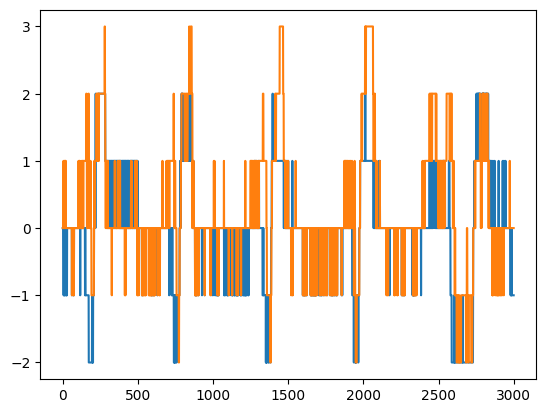

In [19]:
ops = suite2p.default_ops()
ops['data_path'] = ['data/']
ops['save_path0'] = 'output/'
ops['nonrigid'] = False
ops = suite2p.run_s2p(ops=ops)
plt.plot(ops['yoff'])
plt.plot(ops['xoff'])

Run non-rigid motion correction

In [ ]:
ops = suite2p.default_ops()
ops['data_path'] = ['data/']
ops['save_path0'] = 'output/'
ops['nonrigid'] = True
ops = suite2p.run_s2p(ops=ops)

Run suite2p with non-rigid motion correction in `output` directory and plot non-rigid motion trace for the first block.

You will have to delete the old `output` directory. If not, just give another folder name for the exercises.

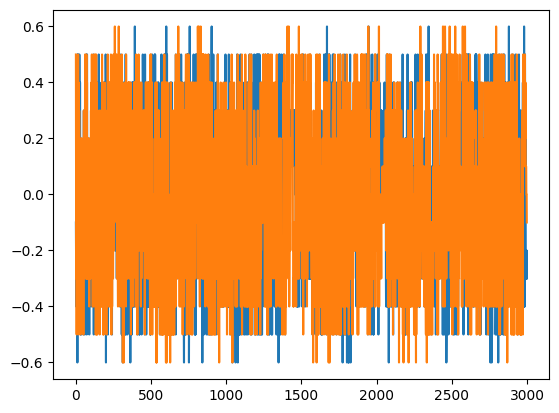

In [ ]:
plt.plot(ops['yoff1'][:, 0])
plt.plot(ops['xoff1'][:, 0])

Plot non-rigid motion trace for the second block.

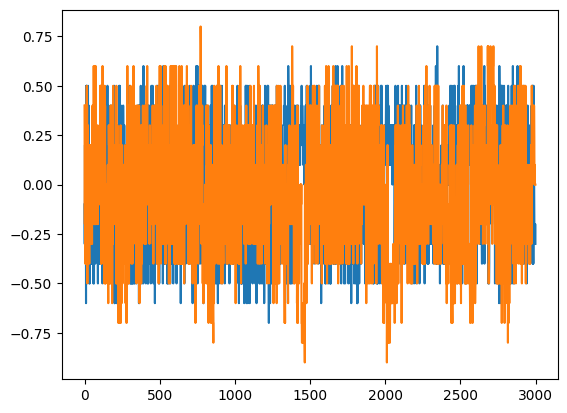

In [ ]:
plt.plot(ops['yoff1'][:, 1])
plt.plot(ops['xoff1'][:, 1])

Run suite2p with non-rigid motion correction in `output_1` directory and plot non-rigid motion trace for the third block.

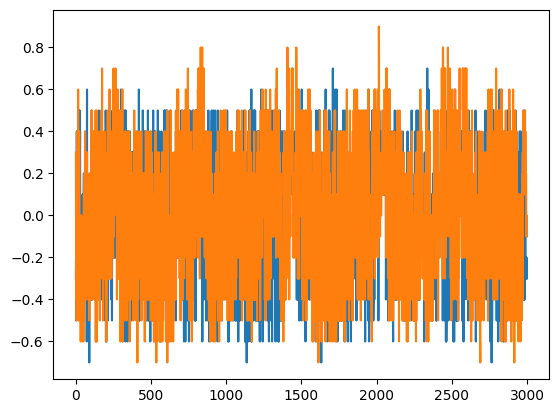

In [ ]:
plt.plot(ops['yoff1'][:, 2])
plt.plot(ops['xoff1'][:, 2])

Run suite2p with non-rigid motion correction in `output_1` directory and plot non-rigid motion trace for the fourth block.

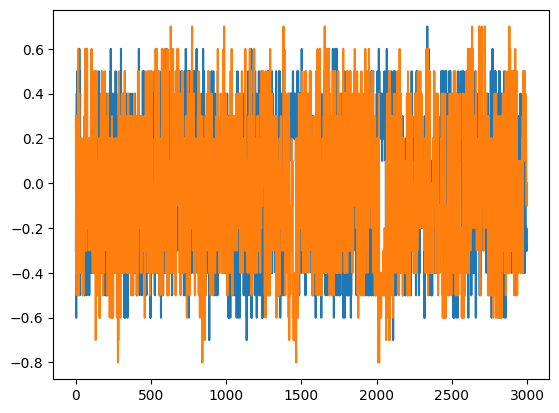

In [42]:
plt.plot(ops['yoff1'][:, 3])
plt.plot(ops['xoff1'][:, 3])

*How do I change block size?*

**Example** Change block size to 100 x 100 and perform non-rigid motion correction. How many blocks were made?

In [54]:
ops = suite2p.default_ops()
ops['data_path'] = ['data/']
ops['save_path0'] = 'output_3/'
ops['nonrigid'] = True
ops['block_size'] = [100, 100]
ops = suite2p.run_s2p(ops=ops);
ops['yoff1'].shape

{}
FOUND BINARIES AND OPS IN ['output_3/suite2p\\plane0\\ops.npy']
removing previous detection and extraction files, if present
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not running registration, plane already registered
binary path: output_3/suite2p\plane0\data.bin
NOTE: applying default C:\Users\sangeetha\.suite2p\classifiers\classifier_user.npy
----------- ROI DETECTION
Binning movie in chunks of length 10
Binned movie of size [300,166,164] created in 0.20 sec.
NOTE: estimated spatial scale ~6 pixels, time epochs 1.00, threshold 5.00 
0 ROIs, score=160.98
Detected 903 ROIs, 1.73 sec
After removing overlaps, 774 ROIs remain
----------- Total 2.57 sec.
----------- EXTRACTION
Masks created, 0.23 sec.
Extracted fluorescence from 774 ROIs in 3000 frames, 1.36 sec.
----------- Total 1.74 sec.
----------- CLASSIFICATION
['compact', 'skew', 'npix_norm']
----------- SPIKE DECONVOLUTION
----------- Total 0.21 sec.
Plane 0 processed in 4.64 sec (can open in GUI).
total = 4.72 

(3000, 9)

Change block size to 170 x 170 and perform non-rigid motion correction. How many blocks were made?

In [59]:
ops = suite2p.default_ops()
ops['data_path'] = ['data/']
ops['save_path0'] = 'output/'
ops['nonrigid'] = True
ops['block_size'] = [170, 170]
ops = suite2p.run_s2p(ops=ops);
ops['yoff1'].shape

{}
tif
** Found 1 tifs - converting to binary **
2000 frames of binary, time 0.51 sec.
time 0.77 sec. Wrote 3000 frames per binary for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: applying default C:\Users\sangeetha\.suite2p\classifiers\classifier_user.npy
----------- REGISTRATION
Reference frame, 1.08 sec.
Registered 500/3000 in 0.55s
Registered 1000/3000 in 1.11s
Registered 1500/3000 in 1.66s
Registered 2000/3000 in 2.22s
Registered 2500/3000 in 2.77s
Registered 3000/3000 in 3.31s
----------- Total 4.96 sec
Registration metrics, 1.69 sec.
----------- ROI DETECTION
Binning movie in chunks of length 10
Binned movie of size [300,166,164] created in 0.18 sec.
NOTE: estimated spatial scale ~6 pixels, time epochs 1.00, threshold 5.00 
0 ROIs, score=83.69
1000 ROIs, score=5.11
Detected 1129 ROIs, 3.16 sec
After removing overlaps, 499 ROIs remain
----------- T

(3000, 1)

## Visualizations From Suite2p

These keys in the ops dictionary store different projections and the reference image used during the image registration process.


| **Code**   | **Description**                                                                |
| :--------- | :----------------------------------------------------------------------------- |
| `refImg`   | Reference **image** used for **registration** in the `ops` dictionary.         |
| `max_proj` | **Maximum projection** of the registered image stored in the `ops` dictionary. |
| `meanImg`  | **Mean projection** of the registered image stored in the `ops` dictionary.    |

Plot reference image used for registration

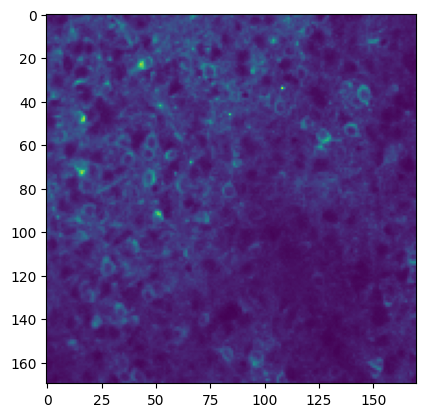

In [63]:
plt.imshow(ops['refImg'])

Plot maximum projection of registered image

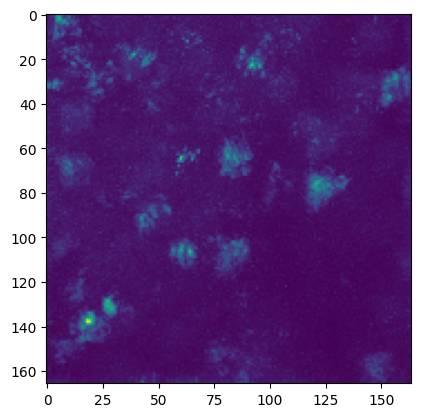

In [64]:
plt.imshow(ops['max_proj'])

Plot mean projection of registered image.

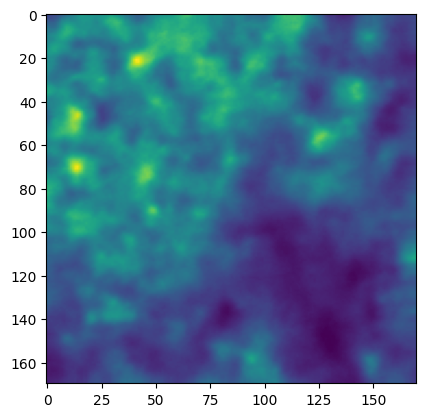

In [65]:
plt.imshow(ops['meanImg'])